# STAA 578 - HW3
**Rodney Murray**

In [1]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
import keras
from keras.metrics import Precision, Recall
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib

matplotlib.style.use('ggplot')

2024-04-22 18:37:31.245265: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Problem 1

## Function Definitions

In [2]:
# borrow function to vectorize the sequences
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results



## Load and Prepare the Data

In [3]:
# Load the data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10_000)

# Prepare the data for training
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [5]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## Build a model similar ot multiclass logistic regression

In [6]:

logistic_model = keras.Sequential([
  keras.layers.Dense(y_train.shape[1], activation="softmax")
])
logistic_model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
logistic_history = logistic_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = logistic_model.evaluate(x_test, y_test)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3460 - loss: 3.3985 - val_accuracy: 0.6190 - val_loss: 2.7011
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6479 - loss: 2.5149 - val_accuracy: 0.6460 - val_loss: 2.2583
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6765 - loss: 2.0802 - val_accuracy: 0.6660 - val_loss: 1.9444
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7036 - loss: 1.7497 - val_accuracy: 0.6840 - val_loss: 1.7148
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7346 - loss: 1.4937 - val_accuracy: 0.7000 - val_loss: 1.5404
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7520 - loss: 1.3211 - val_accuracy: 0.7120 - val_loss: 1.4073
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7761 - loss: 1.1630 - val_accuracy: 0.7240 - val_loss: 1.3028
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7950 - loss: 1.0385 - val_accuracy: 0.7470 - v

## Build our normal model

In [7]:
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3707 - loss: 3.2950 - val_accuracy: 0.6030 - val_loss: 1.9091
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6525 - loss: 1.7043 - val_accuracy: 0.6770 - val_loss: 1.4373
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7285 - loss: 1.2510 - val_accuracy: 0.7270 - val_loss: 1.2453
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7870 - loss: 1.0115 - val_accuracy: 0.7710 - val_loss: 1.1159
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8322 - loss: 0.8298 - val_accuracy: 0.7850 - val_loss: 1.0305
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8561 - loss: 0.6886 - val_accuracy: 0.7920 - val_loss: 0.9880
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8788 - loss: 0.5835 - val_accuracy: 0.7980 - val_loss: 0.9431
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9021 - loss: 0.4632 - val_accuracy: 0.8140 - v

In [8]:
logistic_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

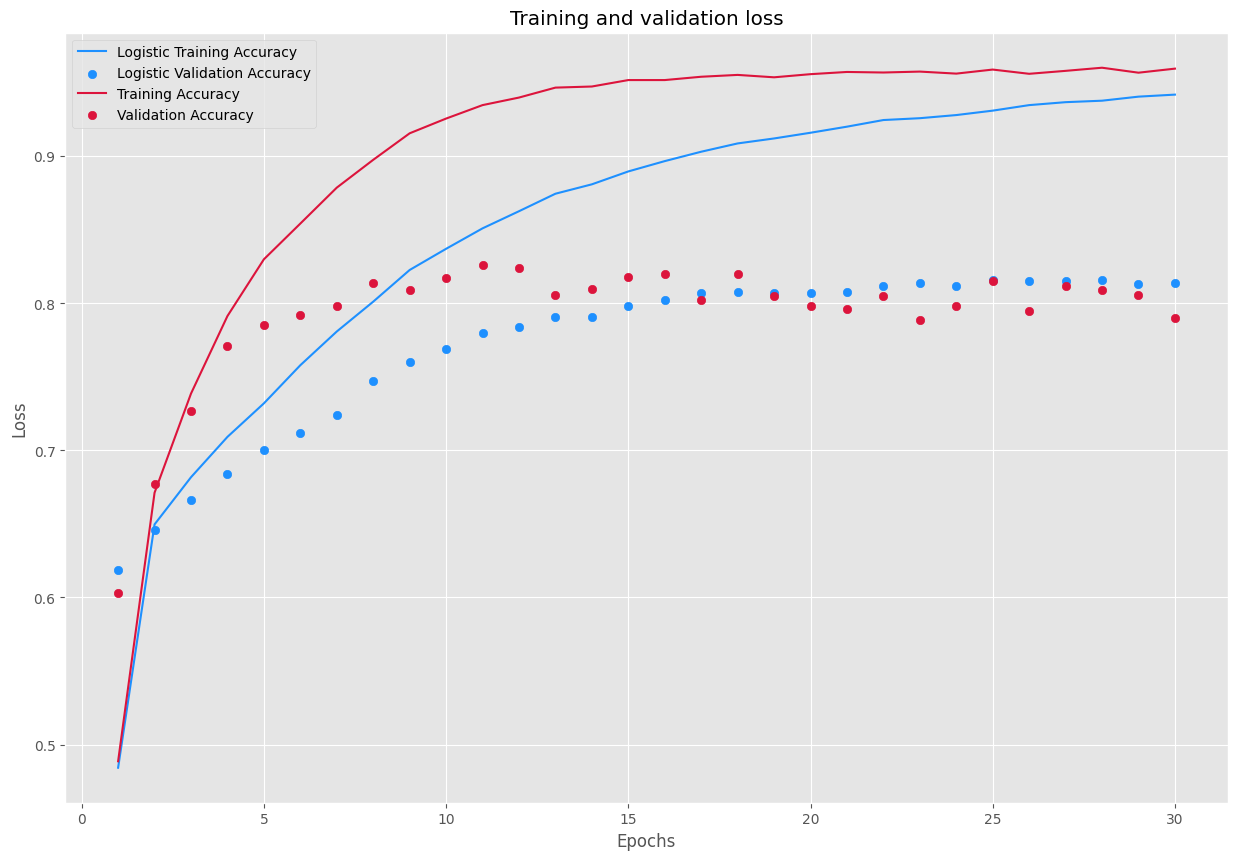

In [9]:
loss = logistic_history.history["loss"]
val_loss = logistic_history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(15,10))
plt.plot(epochs, logistic_history.history['accuracy'], label="Logistic Training Accuracy", color='dodgerblue')
plt.scatter(epochs, logistic_history.history['val_accuracy'], label="Logistic Validation Accuracy", color='dodgerblue')

plt.plot(epochs, history.history['accuracy'], label="Training Accuracy", color='crimson')
plt.scatter(epochs, history.history['val_accuracy'], label="Validation Accuracy", color='crimson')


plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Conclusions
As we can see in the plot above an approximate multi-class logistic regression model has similar performance on the validation data once it has approached its optimum when compared to a deep neural network. We can also see that the deep neural network does fit the training data better, but is not able to generalize any better as evidenced by the higher training accuracy but similar validation accuracy.

# Problem 2

## Load and Split Data
Load the data using pandas and split it into a training and test set with scikit learns `train_test_split()` function

In [10]:
messages = pd.read_csv('./Homework/hw3/messages.csv')
messages.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1252,V1253,V1254,V1255,V1256,V1257,V1258,V1259,V1260,V1261
0,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
messages['V1'].value_counts()

V1
ham     4827
spam     747
Name: count, dtype: int64

In [12]:
x = messages.iloc[:, 1:].values
y = (messages.iloc[:, 0] == 'spam').values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


## Baseline Model
Try Logistic Regression as a baseline method

In [13]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

logistic_metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
}
logistic_cm = confusion_matrix(y_test, y_pred)

print(f'Logistic Regression Accuracy:\t{logistic_metrics['accuracy']:0.1%}')
print(f'Logistic Regression Precision:\t{logistic_metrics['precision']:0.1%}')
print(f'Logistic Regression Recall:\t{logistic_metrics['recall']:0.1%}')

Logistic Regression Accuracy:	97.8%
Logistic Regression Precision:	98.5%
Logistic Regression Recall:	86.0%


## Deep Learning Model

In [14]:
spam_model = keras.Sequential(
    [
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

metrics = ["accuracy", Precision(), Recall()]

spam_model.compile(
    optimizer="rmsprop", loss="binary_crossentropy", metrics=metrics
)
history = spam_model.fit(
    x_train, y_train, epochs=30, batch_size=512, validation_data=(x_test, y_test)
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8601 - loss: 0.6246 - precision: 0.0455 - recall: 0.0050 - val_accuracy: 0.8595 - val_loss: 0.5077 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8674 - loss: 0.4642 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8595 - val_loss: 0.3849 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8684 - loss: 0.3488 - precision: 0.7778 - recall: 0.0076 - val_accuracy: 0.8793 - val_loss: 0.2987 - val_precision: 1.0000 - val_recall: 0.1404
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8956 - loss: 0.2664 - precision: 1.0000 - recall: 0.2036 - val_accuracy: 0.9283 - val_loss: 0.2341 - val_precision: 1.0000 - val_recall: 0.4894
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9369 - loss: 0.2067 - precision: 1.0000 - recall: 0.5208 - val_accuracy: 0.9564 - val_los

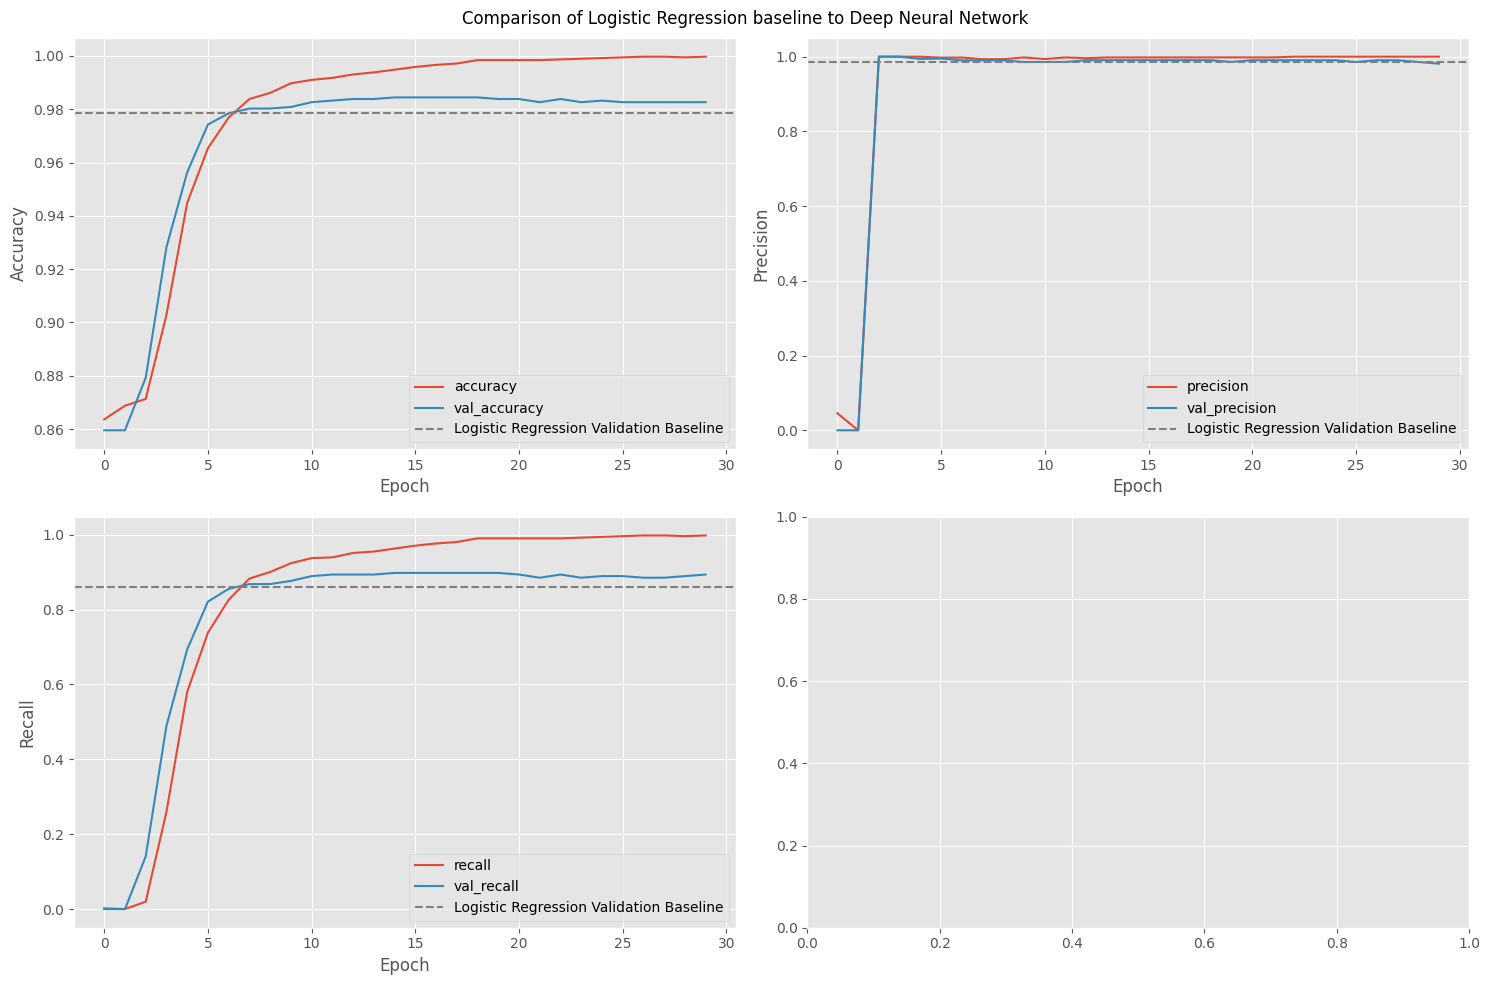

Best NN Validation Accuracy:	98.4%
Best NN Validation Precision:	100.0%
Best NN Validation Recall:	89.8%


In [15]:
# Get history format in something easier to plot
hist_df = pd.DataFrame(history.history).reset_index(names='epoch')
hist_df.columns = hist_df.columns.str.replace('_2', '').str.replace('_3', '')

metrics = ['accuracy', 'precision', 'recall']
fig, axes = plt.subplots(2, 2, figsize=(15,10), tight_layout=True)
for ax, metric in zip(axes.flatten(), metrics):
    hist_df.plot(x='epoch', y=[metric, f'val_{metric}'], kind='line', ax=ax)
    ax.axhline(logistic_metrics[metric], color='grey', linestyle='--', label='Logistic Regression Validation Baseline')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric.title())
    ax.legend()
plt.suptitle('Comparison of Logistic Regression baseline to Deep Neural Network')
plt.show()

print(f'Best NN Validation Accuracy:\t{hist_df['val_accuracy'].max():0.1%}')
print(f'Best NN Validation Precision:\t{hist_df['val_precision'].max():0.1%}')
print(f'Best NN Validation Recall:\t{hist_df['val_recall'].max():0.1%}')


## Conclusions
Initially I had split the data into a training and test set so that we could compare the two models on the same set of unseen data where scikit-learns `train_test_split()` function was used and a test size of 30% was used. I then use scikit-learns `LogisticRegression()` model as a basline (important to note that they include an l2 penalty as a default), where the observed accuracy on the test set was 98.2%.

I fit a deep learning model with 2 hidden layers with 64 neurons in each, similar to what we had done before. A binary crossentropy loss function was used with the rmsprop optimizer with default arguments to fit the neural network to our training set. As we can see in the training and validation curves in the plot above, the neural network was able to out-perform our logistic gregression model where the best validation accuracy was 98.8%. However, when we take a closer look at the number of spam vs. ham messages we see that the dataset is very imbalanced where 747 out of the 5574 messages were spam, this indicates that we should look at some other metrics since a model that would always return "ham" could achieve an accuracy of 91.5% due to the overabundance of "ham" messages. I chose to also look at the precision and recall metrics since they are less sensitive to imbalanced data, and we can see that our neural network outperforms the logistic regression baseline in both of those metrics. The recall metric shows that we could potentially perform better here. 

Depending on the needs of the model we could also examine the ROC curve to see if there is a better probability threshold to determine which class a message belongs to, however we typically end up making a trade off for better recall at the cost of decreased precision or visa-versa.